In [ ]:
# Installing MNE library that contains brain related data
!pip install mne

In [ ]:
# Importing mne libraries 
import os
import numpy as np
import mne

# Downloading brain waves datasets
sample_data_folder = mne.datasets.sample.data_path()
sample_data_evk_file = os.path.join(sample_data_folder, 'MEG', 'sample',
                                    'sample_audvis-ave.fif')
evokeds_list = mne.read_evokeds(sample_data_evk_file, baseline=(None, 0),
                                proj=True, verbose=False)# Show the condition names, and reassure ourselves that baseline correction has been applied.
for e in evokeds_list:
    print(f'Condition: {e.comment}, baseline: {e.baseline}')

Condition: Left Auditory, baseline: (-0.19979521315838786, 0.0)
Condition: Right Auditory, baseline: (-0.19979521315838786, 0.0)
Condition: Left visual, baseline: (-0.19979521315838786, 0.0)
Condition: Right visual, baseline: (-0.19979521315838786, 0.0)


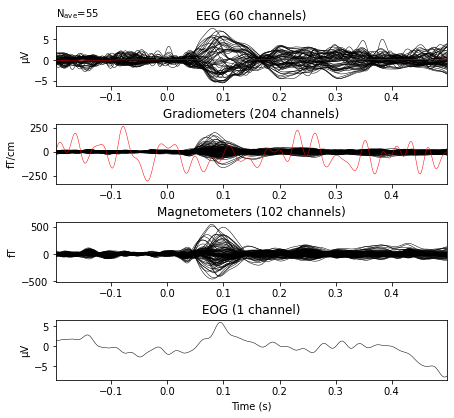

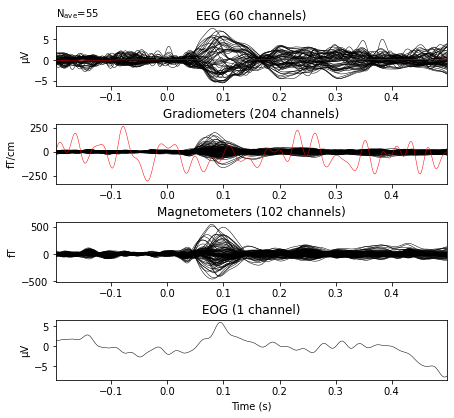

In [ ]:
#plotting different brain waves data
conds = ('aud/left', 'aud/right', 'vis/left', 'vis/right')
evks = dict(zip(conds, evokeds_list))
evks['aud/left'].plot(exclude=[])


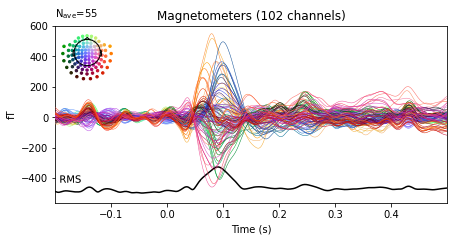

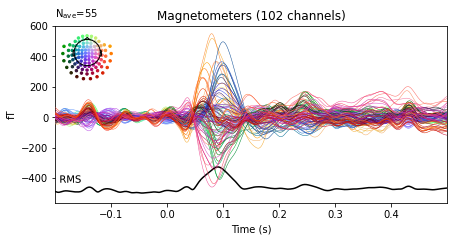

In [ ]:
evks['aud/left'].plot(picks='mag', spatial_colors=True, gfp=True)

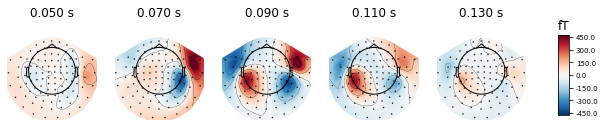

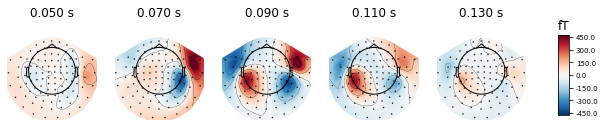

In [ ]:
times = np.linspace(0.05, 0.13, 5)
evks['aud/left'].plot_topomap(ch_type='mag', times=times, colorbar=True)


combining channels using "mean"
combining channels using "mean"
combining channels using "mean"
combining channels using "mean"


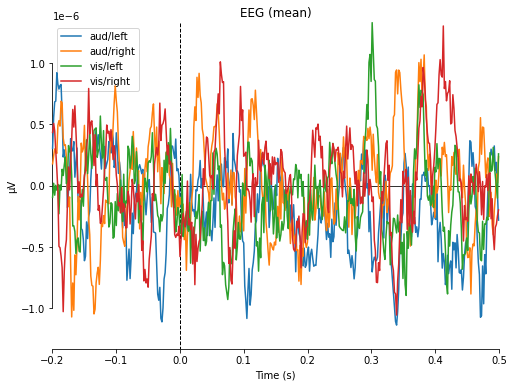

combining channels using "median"
combining channels using "median"
combining channels using "median"
combining channels using "median"


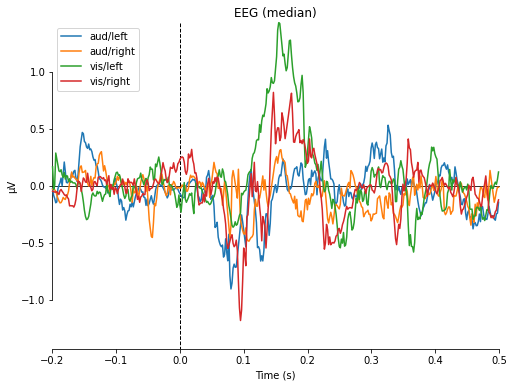

combining channels using "gfp"
combining channels using "gfp"
combining channels using "gfp"
combining channels using "gfp"


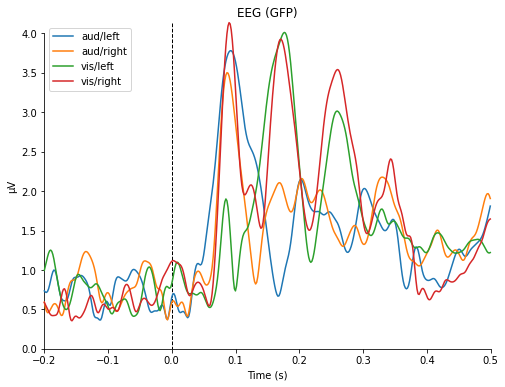

combining channels using "<function custom_func at 0x7f177559b560>"
combining channels using "<function custom_func at 0x7f177559b560>"
combining channels using "<function custom_func at 0x7f177559b560>"
combining channels using "<function custom_func at 0x7f177559b560>"


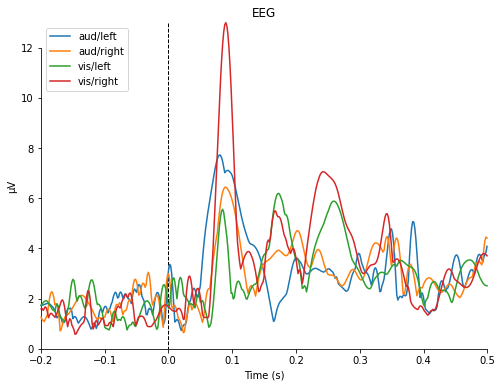

In [ ]:
def custom_func(x):
    return x.max(axis=1)
for combine in ('mean', 'median', 'gfp', custom_func):
    mne.viz.plot_compare_evokeds(evks, picks='eeg', combine=combine)

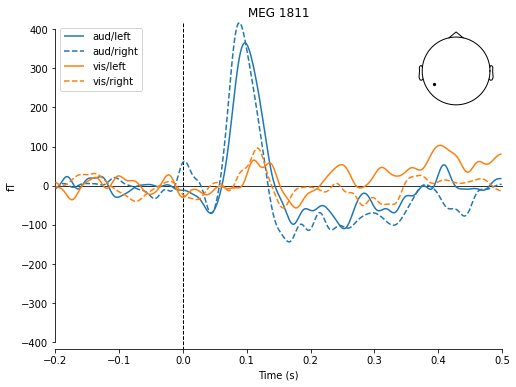

[<Figure size 576x432 with 2 Axes>]

In [ ]:
mne.viz.plot_compare_evokeds(evks, picks='MEG 1811', colors=dict(aud=0, vis=1),
                             linestyles=dict(left='solid', right='dashed'))

combining channels using "gfp"


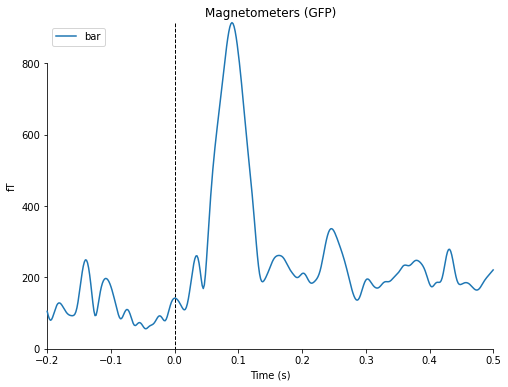

[<Figure size 576x432 with 1 Axes>]

In [ ]:
temp_list = list()
for idx, _comment in enumerate(('foo', 'foo', '', None, 'bar'), start=1):
    _evk = evokeds_list[0].copy()
    _evk.comment = _comment
    _evk.data *= idx  # so we can tell the traces apart
temp_list.append(_evk)
mne.viz.plot_compare_evokeds(temp_list, picks='mag')

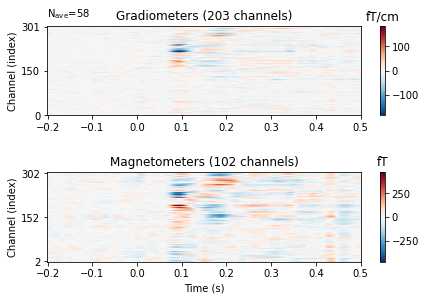

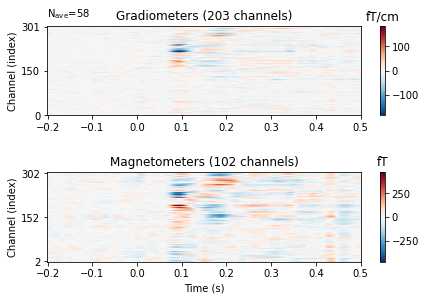

In [ ]:
evks['vis/right'].plot_image(picks='meg')

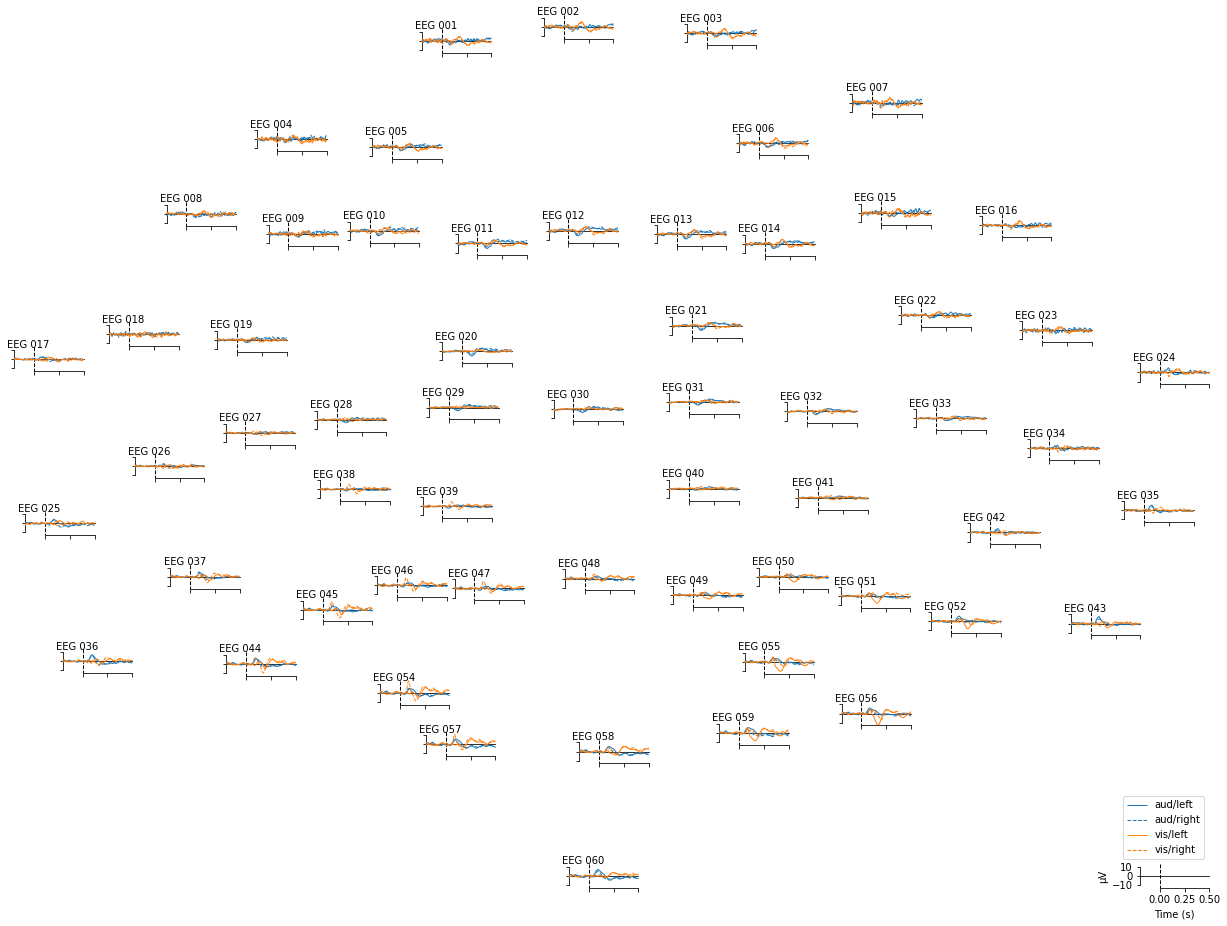

[<Figure size 1296x1008 with 60 Axes>]

In [ ]:
mne.viz.plot_compare_evokeds(evks, picks='eeg', colors=dict(aud=0, vis=1),
                             linestyles=dict(left='solid', right='dashed'),
                             axes='topo', styles=dict(aud=dict(linewidth=1),
                                                      vis=dict(linewidth=1)))

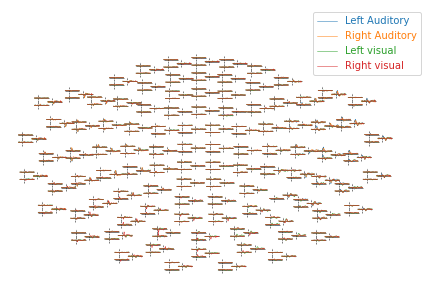

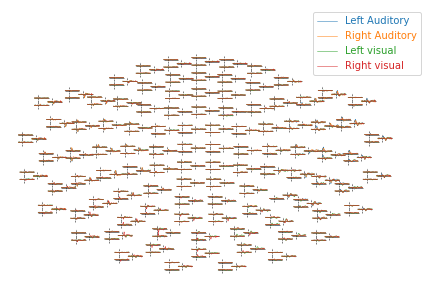

In [ ]:
mne.viz.plot_evoked_topo(evokeds_list)

In [ ]:
subjects_dir = os.path.join(sample_data_folder, 'subjects')
sample_data_trans_file = os.path.join(sample_data_folder, 'MEG', 'sample',
                                      'sample_audvis_raw-trans.fif')

In [ ]:
!pip install pyvista
!pip install vtk
maps = mne.make_field_map(evks['aud/left'], trans=sample_data_trans_file,
                          subject='sample', subjects_dir=subjects_dir)
evks['aud/left'].plot_field(maps, time=0.1)

     |████████████████████████████████| 1.4 MB 24.7 MB/s 
     |████████████████████████████████| 88.3 MB 1.3 MB/s 
     |████████████████████████████████| 1.1 MB 49.9 MB/s 
     |████████████████████████████████| 144 kB 54.1 MB/s 
     |████████████████████████████████| 94 kB 3.4 MB/s 
     |████████████████████████████████| 271 kB 60.4 MB/s 
Using surface from /root/mne_data/MNE-sample-data/subjects/sample/bem/sample-5120-5120-5120-bem.fif.
Getting helmet for system 306m
Prepare EEG mapping...
Computing dot products for 59 electrodes...
Computing dot products for 2562 surface locations...
Field mapping data ready
    Preparing the mapping matrix...
    Truncating at 21/59 components to omit less than 0.001 (0.00097)
    The map has an average electrode reference (2562 channels)
Prepare MEG mapping...
Computing dot products for 305 coils...
Computing dot products for 304 surface locations...
Field mapping data ready
    Preparing the mapping matrix...
    Truncating at 210/305 compone